## Combining the CSV of all Participants

In [1]:
#Basics
from __future__ import division

%matplotlib inline
import os
import pandas as pd
import datetime as dt
import imageio
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
#from keras.models import Sequential, Model


#Stats
#import mne
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

# Graphics
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLMParams
from statsmodels.stats.weightstats import DescrStatsW


#import pyvttbl as pt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import warnings
from scipy.stats.mstats import zscore
#matplotlib.use('TkAgg')  
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hac
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
import mycharite
import mystats 

In [2]:
study='charite'

In [3]:
def smooth(df):
    round_df=df
    for i in set(df.vpn):
        for au in action_r:
            round_df.loc[round_df.vpn==i, au]=round_df.loc[round_df.vpn==i, au].rolling(30, win_type='triang').mean()
    return round_df

In [4]:
# load dataframe
df, df_audio, action_r, action_c, gaze, audio =mycharite.load('charite')
df=mycharite.aq_charite(df)
df=mycharite.ados_charite(df)

print ('NT ' + str(sum(df.groupby('vpn').mean().asc==0)))
print ('ASC ' + str(sum(df.groupby('vpn').mean().asc==1)))

df=mycharite.exclude_outlier(df)

print ('NT ' + str(sum(df.groupby('vpn').mean().asc==0)))
print ('ASC ' + str(sum(df.groupby('vpn').mean().asc==1)))

df=mycharite.adapt_times(df)

Proband 53 ist korrekt als NT gelabelt
Proband 75 ist falsch als NT gelabelt
NT 43
ASC 37
set()
all participants excluded that were tracked with a successrate less than 0.9
935964
934828
all non-successfully tracked frames excluded
all frames excluded that were tracked with a lower confidence than 0.75
934828
NT 43
ASC 37


In [5]:
var=['gaze_angle_x', 'gaze_angle_y']
df_speed_acc=mycharite.calc_speed(df, var)
df=mycharite.calc_gaze_var(df)

0.22112213819516127
0.274985454160761
0.09347726996441436
0.2428723944790762
1.1114004678782532
1.3155515953393846
0.15363267881541348
0.24222510191968133
0.09835141076771599
0.2680447723795411
0.14140014144264496
0.20290638235403044
0.13854602123482293
0.2645070887518896
0.6711840284154562
0.6409469556835418
0.5059584963215856
0.49166858756686904
1.450523353827852
1.331979354194351
0.5619537347504685
0.5069911241826626
0.43177077251708457
0.5379739770658056
0.39792084640038655
0.48162329677871685
0.6769734115901451
0.6222620026966134
0.33776323068090164
0.27158792314828734
0.3776638717166364
0.31527924130839946
0.8583128800152074
0.7902607164727347
0.24319128273850607
0.1865368596283319
0.3275728926513914
0.26424042082921373
0.21918941580286216
0.19186192952224784
0.3197045511093015
0.35957057721676833
0.5285300369893844
0.3245258079105574
0.5323889555578704
0.33737812614335266
1.4155525422957638
0.9054501642829382
0.4703296716134333
0.3436131545793903
0.5305497149184042
0.36331391385

0.3607409042512368
0.2517121371726044
0.19196093352554838
0.820206681270032
0.6067932102454675
0.44744943848439456
0.31294248672879177
0.27788306893367937
0.17643979143039137
0.34091054545144245
0.24646095025378767
0.22837907084494413
0.14561593319413915
0.27727423248473704
0.25457808232446094
0.25381292323284094
0.18539956850003725
0.5661448577881812
0.5238558962157437
0.323250676720096
0.3228776858192588
0.23399786323810737
0.18590857968367136
0.23780664414603728
0.2051487265376025
0.2601922366251537
0.22398883900766126
0.4586392918187451
0.4653579267617562
0.5113071483951697
0.6948035693633129
1.249011609233477
1.5421922707626308
0.38736158818344396
0.4293739628808435
0.5883264399973879
0.6687637849046554
0.34930073003072865
0.35773034537204135
0.5972645979798233
0.717702584640741
0.46509998924962365
0.33906783981970334
0.4082548223842555
0.35026561349924146
0.9005670435897596
0.8641307771396642
0.4745840283869654
0.4790093944798996
0.32690824400739726
0.2744321409747772
0.491207695

0.6359213787882901
0.5322536989068276
0.3311615919758812
0.26993702969396405
0.2249222087745005
0.20876781361119812
0.269480982631428
0.2593954510009765
0.1776091213873882
0.18438004230393265
0.4048987527765429
0.35728839891605774
0.4978764907082881
0.3001866086286995
1.2596737672905631
0.9067077809305487
0.25660475443763703
0.2114000946073582
0.4075426358063656
0.3065827783813044
0.2704995378923964
0.20640251936446896
0.44423529801221334
0.3009983388658482
0.6510514572597161
0.5303649686772307
0.5421964588597016
0.41238574175157894
1.341526742185932
1.0335840556045746
0.6910180894882565
0.48262718530973775
0.5289782604228647
0.3871511332800151
0.7469022693766568
0.458032749920789
0.5014399266113538
0.39113936135346955
0.4270011709585818
0.39643536673712654
0.46008803505416224
0.4877704378086068
0.9947788699002407
0.9258412390901586
0.33918578979668357
0.32407252274760967
0.438700353316475
0.3759042431258258
0.4531313275420273
0.39761161954852375
0.4723864943031289
0.44645940464951567


In [6]:
df=pd.merge(df, df_speed_acc, on=['vpn', 'conversation'], how='left')

In [7]:
# df=mycharite.outlier_trials(df, ['gaze_angle_x', 'gaze_angle_y'], 'sd')
# it excludes to many frames and also the data seems actually normally distributed

In [8]:
new_features=['gaze_angle_x', 'gaze_angle_y',
              'gaze_angle_x_centered', 'gaze_angle_y_centered',
              'gaze_angle_x_abs', 'gaze_angle_y_abs', 
              'gaze_angle_total_centered_abs',
              'mean_speed_gaze_angle_x', 'mean_acc_gaze_angle_x',
              'var_speed_gaze_angle_x', 'var_acc_gaze_angle_x', 
              'mean_speed_gaze_angle_y', 'mean_acc_gaze_angle_y', 
              'var_speed_gaze_angle_y', 'var_acc_gaze_angle_y']

## Descriptives

In [9]:
for i in new_features:
    print (i)
    print (df.groupby('vpn').mean().groupby('asc')[i].describe())

gaze_angle_x
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0.0   43.0  0.016518  0.063231 -0.112386 -0.028058  0.010775  0.049149   
1.0   37.0  0.010278  0.072254 -0.186337 -0.037048  0.012985  0.047084   

          max  
asc            
0.0  0.157438  
1.0  0.134975  
gaze_angle_y
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0.0   43.0 -0.246410  0.123316 -0.507079 -0.322308 -0.252438 -0.160615   
1.0   37.0 -0.225748  0.112792 -0.440431 -0.286885 -0.221267 -0.170626   

          max  
asc            
0.0  0.061596  
1.0  0.042217  
gaze_angle_x_centered
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0.0   43.0 -0.001040  0.004652 -0.018386 -0.002515 -0.000867  0.001036   
1.0   37

In [27]:
def group_comparison(df):
    var=['mean_speed_gaze_angle_x', 'mean_acc_gaze_angle_x',
              'mean_speed_gaze_angle_y', 'mean_acc_gaze_angle_y']
    
    

    for i in var:
        print (i)
        df1=df[df.asc==0].groupby('vpn').mean()
        df2=df[df.asc==1].groupby('vpn').mean()
        mystats.two_ind_sample_tests(df1, df2, i)
        
group_comparison(df)

mean_speed_gaze_angle_x
normally distributed - now variance homogenity is checked:
Ttest_indResult(statistic=-0.3312911843468084, pvalue=0.7413129724565434)
Effect Size for Independent T-Test
-0.0752404814453115
Dataframe one
mean:0.4598657719344011
Confidence Intervall
(0.41443055496184517, 0.5053009889069566)
Dataframe two
mean:0.4712825696521213
Confidence Intervall
(0.4177856695729167, 0.5247794697313263)
mean_acc_gaze_angle_x
normally distributed - now variance homogenity is checked:
Ttest_indResult(statistic=-0.2675971883937361, pvalue=0.7897157257580618)
Effect Size for Independent T-Test
-0.060773749294251105
Dataframe one
mean:0.6848484413600032
Confidence Intervall
(0.6148051002692347, 0.7548917824507717)
Dataframe two
mean:0.6989437753363481
Confidence Intervall
(0.6178746916838507, 0.7800128589888453)
mean_speed_gaze_angle_y
not normally distributed: p1=0.002704539569094777 p2=0.0023093472700566053
Mann-Whitney-U-Test: U=667.0p=0.1083856006650954
Effectsize:0.16153362664990

# Smooth

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'frame', 'timestamp', 'confidence',
       'success', 'gaze_angle_x', 'gaze_angle_y', 'AU01_r', 'AU02_r', 'AU04_r',
       'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
       'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r',
       'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c',
       'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c',
       'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'vpn', 'neutral_speaker_start',
       'neutral_proband_start', 'joy_speaker_start', 'joy_proband_start',
       'disgust_speaker_start', 'disgust_proband_start', 'disgust_proband_end',
       'intro', 'neutral_speaker', 'neutral_participant', 'joy_speaker',
       'joy_participant', 'disgust_speaker', 'disgust_participant',
       'timepoint', 'asq', 'asd', 'sex', 'age', 'main_diagnosis', 'ados_commu',
       'ados_social', 'ados_total', 'adir_social', 'adir_commu', 'adir_behav',
      

In [29]:
def smooth(df):
    df.index = pd.to_datetime(df['timepoint'].astype('float64'), unit='s')
    df=df.groupby(['vpn']).resample('S').mean().reset_index(drop=True)
    return df

In [14]:
df_small=df.groupby(['vpn', 'conversation']).mean() #ACHTUNG HAB HIER HABEN WIR FÜR JEDEN PROBANDEN NUR NOCH 7 WERTE
df_small=pd.merge(df_small, df_speed_acc, on=['vpn', 'conversation'])

# Graphs

In [15]:
def time_plot(df, var, title):
    plt.plot(np.array(df.reset_index(drop=True).groupby(['counter']).mean()[var]), color='green')
    plt.plot(np.array(df[df.asc==0].reset_index(drop=True).groupby(['counter']).mean()[var]), color='blue')
    #scale!!!
    plt.title(str(title))
    plt.show()

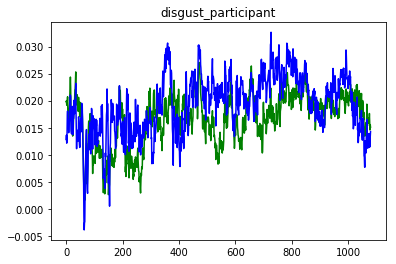

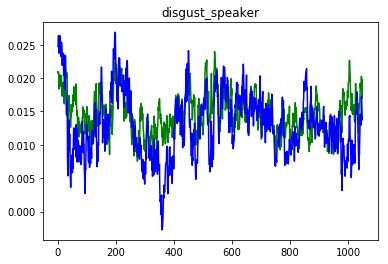

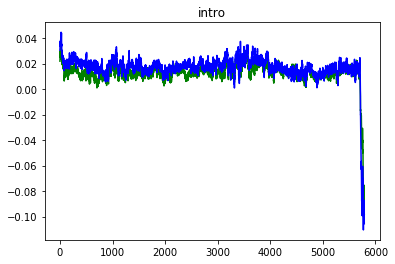

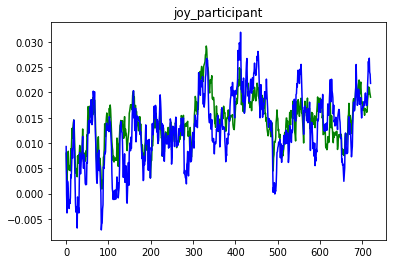

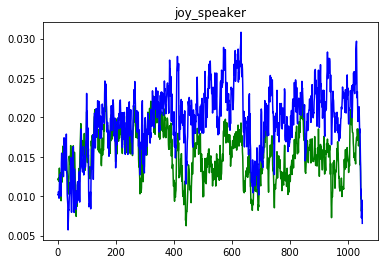

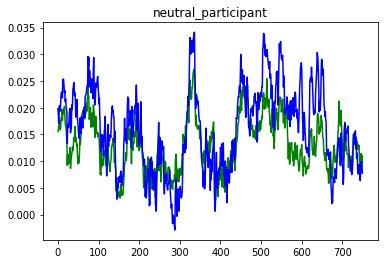

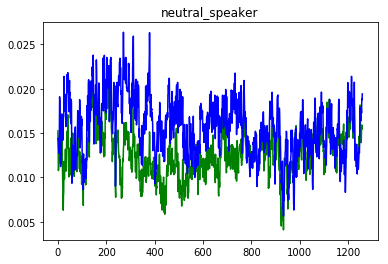

In [16]:
for con in np.unique(df.conversation):
    time_plot(df[df.conversation==con], 'gaze_angle_x', con)

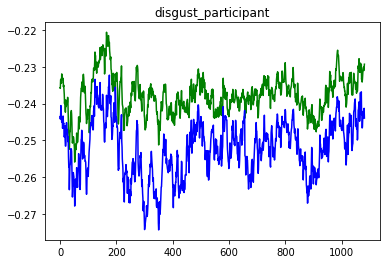

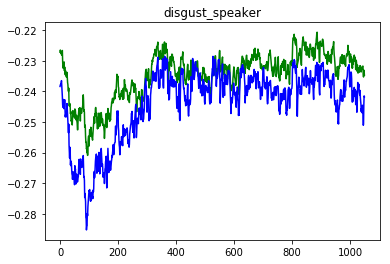

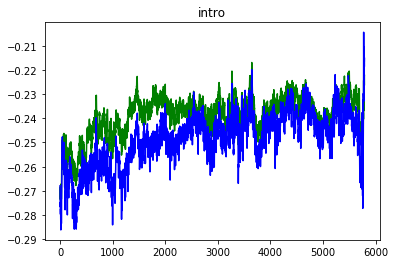

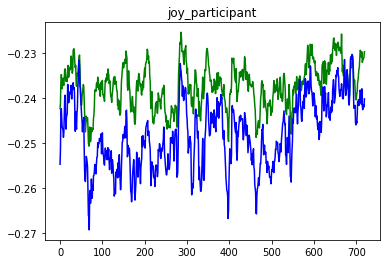

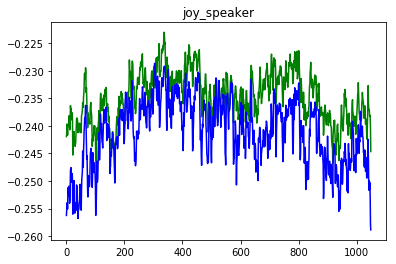

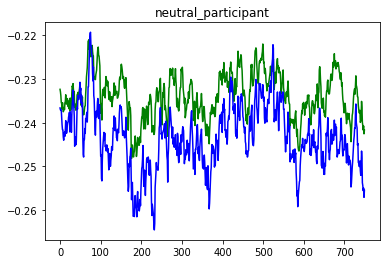

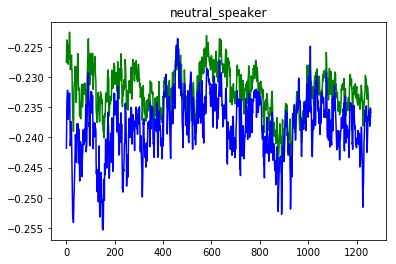

In [17]:
for con in np.unique(df.conversation):
    time_plot(df[df.conversation==con], 'gaze_angle_y', con)

In [18]:
def gaze_heat(df, title):
    plt.close()
    sns.kdeplot(df.gaze_angle_x_centered, df.gaze_angle_y_centered, cmap="Reds", shade=True, shade_lowest=False)
    plt.ylim(-0.1, 0.1)
    plt.xlim(-0.2, 0.2)
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('X-Angle of Gaze', fontsize=18) 
    plt.ylabel(('Y-Angle of Gaze'), fontsize=18)
    plt.legend(loc='upper left', fontsize=16)  
    plt.savefig('Gaze_'+ str(title) + '_.png')
    plt.show() 


In [19]:
def gaze_heat_not_centered(df, title):
    plt.close()
    sns.kdeplot(df.gaze_angle_x, df.gaze_angle_y, cmap="Reds", shade=True, shade_lowest=False)
    plt.ylim(-0.1, 0.1)
    plt.xlim(-0.2, 0.2)
    plt.yticks(fontsize=16)    
    plt.xticks(fontsize=16)  
    plt.xlabel('X-Angle of Gaze', fontsize=18) 
    plt.ylabel(('Y-Angle of Gaze'), fontsize=18)
    plt.legend(loc='upper left', fontsize=16)  
    plt.savefig('Gaze_'+ str(title) + '_.png')
    plt.show() 


C:\Users\Hanna.Drimalla\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


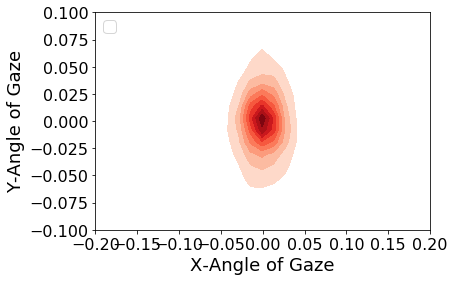

No handles with labels found to put in legend.


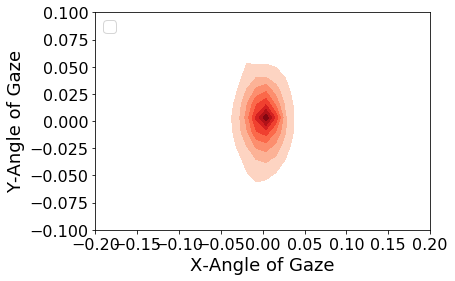

In [20]:
gaze_heat(df[df.asc==1].reset_index(drop=True), 'ASC')
gaze_heat(df[df.asc==0].reset_index(drop=True), 'ASC')

KeyboardInterrupt: 

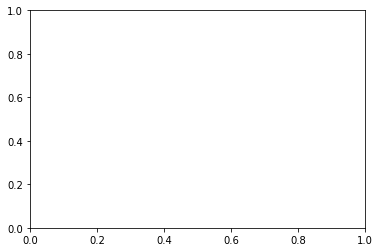

In [21]:
gaze_heat_not_centered(df[df.asc==1].reset_index(drop=True), 'ASC')
gaze_heat_not_centered(df[df.asc==0].reset_index(drop=True), 'ASC')

In [ ]:
plt.hist(df[df.asc==0].groupby('vpn').max().gaze_angle_y)
plt.show()

plt.hist(df[df.asc==1].groupby('vpn').max().gaze_angle_y)
plt.show()

In [ ]:
plt.hist(df[df.sex==1][df.asc==0].groupby('vpn').mean().gaze_angle_y)
plt.show()

plt.hist(df[df.sex==1][df.asc==1].groupby('vpn').mean().gaze_angle_y)
plt.show()

In [ ]:
#df.groupby('vpn').max().counter

In [ ]:
window=1000
i=10
plt.plot(df[df.vpn==i]['gaze_angle_y'].reset_index(drop=True).rolling(window=window).mean().reset_index(drop=True), color='blue')
#plt.plot(df[df.vpn==i]['gaze_angle_x'], color='red')

#plt.ylim(-0.15, 0.15)
#plt.plot(np.mean(speeds_nt.iloc[:, 0:-2].rolling(window=window).mean(), axis=0), color='green')
plt.show()

In [ ]:
accs_asc=accs[(accs.asc==1)]
accs_nt=accs[(accs.asc==0)]

plt.plot(np.mean(accs_asc.iloc[:,0:-2], axis=0), color='blue')
plt.plot(np.mean(accs_nt.iloc[:, 0:-2], axis=0), color='green')
plt.show()

In [ ]:
plt.hist(((df[df.asc==0].groupby('vpn').mean().gaze_angle_x_centered_abs)))
plt.show()

In [ ]:
plt.hist(((df[df.asc==1].groupby('vpn').mean().gaze_angle_x_centered_abs)))
plt.show()

In [ ]:
plt.scatter(df.groupby('vpn').mean()['gaze_angle_x_centered_abs'],
           df.groupby('vpn').mean()['asq'])
plt.show()

# Calculations 

In [ ]:
## Group Comparsiond: Gaze Variation

In [ ]:
# ACHTUNG: 1 is female!!!

var = ['gaze_angle_y',
       'gaze_angle_x', 'gaze_angle_x_abs',
       'gaze_angle_y_abs', 
       'mean_speed_gaze_angle_x', 'mean_acc_gaze_angle_x',
       'mean_speed_gaze_angle_y', 'mean_acc_gaze_angle_y']

df_small=df_small[df_small.conversation!='intro']
df_small=df_small[df_small.vpn!=1]
   
for v in var:
    print (v)
    print (mystats.two_ind_sample_tests(df_small[(df_small.asc==0)].groupby('vpn').mean(), 
                         df_small[(df_small.asc==1)].groupby('vpn').mean(), v))

In [ ]:
def correlations (df, traits, gaze_features):
    for trait in traits:

        for gaz in gaze_features:
            try:
                print (gaz)
                print (trait)
                a=df[df[trait]>0].groupby('vpn').mean()[[trait, gaz]].dropna()
                mystats.correlation(a[trait], a[gaz])
                plt.scatter(a[trait], a[gaz])
                plt.show()
            except: 
                print ('not calculable')
       
        
gaze_features=['gaze_angle_y',
       'gaze_angle_x', 'gaze_angle_x_abs',
       'gaze_angle_y_abs',
       'mean_speed_gaze_angle_x', 'mean_acc_gaze_angle_x',
       'mean_speed_gaze_angle_y', 'mean_acc_gaze_angle_y']

traits=['ados_commu', 'ados_social', 'ados_total', 'adir_social', 'adir_commu', 'adir_behav',
       'adir_onset']

correlations (df_small, traits, gaze_features)

In [ ]:
def graphics(df):
    #df_small=df_small[df_small.conversation!='intro'][df.whospeaks=='actress']
    df_nt=df_small[df_small.asc==0].groupby(['vpn']).mean().reset_index(drop=True)
    df_asc=df_small[df_small.asc==1].groupby(['vpn']).mean().reset_index(drop=True)

    var = ['gaze_angle_x',
           'gaze_angle_y', 'gaze_angle_x_abs',
           'gaze_angle_y_abs', 
           'mean_speed_gaze_angle_x', 'mean_acc_gaze_angle_x',
           'var_speed_gaze_angle_x', 'var_acc_gaze_angle_x',
           'mean_speed_gaze_angle_y', 'mean_acc_gaze_angle_y',
           'var_speed_gaze_angle_y', 'var_acc_gaze_angle_y']

    for v in var:
        print (v)
        #mystats.two_ind_sample_tests(df_nt, df_asc, v)
        plt.hist(df_nt[v], color='blue')
        plt.hist(df_asc[v], color='red')
        plt.show()

In [ ]:
# ACHTUNG: 1 is female!!!

def gender_analysis(df):
    gender=[1, 2]
    var = ['gaze_angle_y',
           'gaze_angle_x', 'gaze_angle_x_abs',
           'gaze_angle_y_abs', 
           'mean_speed_gaze_angle_x', 'mean_acc_gaze_angle_x',
           'mean_speed_gaze_angle_y', 'mean_acc_gaze_angle_y']
    df_small=df_small[df_small.conversation!='intro']

    for g in gender:
        print (g)
        print (len(df_small[ (df_small.sex==g) &(df_small.asc==0)].groupby('vpn').mean()))
        print (len(df_small[ (df_small.sex==g) &(df_small.asc==1)].groupby('vpn').mean()))
        for v in var:
            print (v)
            print (mystats.two_ind_sample_tests(df_small[ (df_small.sex==g) &(df_small.asc==0)].groupby('vpn').mean(), 
                                 df_small[(df_small.sex==g) &(df_small.asc==1)].groupby('vpn').mean(), v))


    gender=[1, 2]
    var = ['gaze_angle_y',
           'gaze_angle_x', 'gaze_angle_x_abs',
           'gaze_angle_y_abs', 
           'mean_speed_gaze_angle_x', 'mean_acc_gaze_angle_x',
           'mean_speed_gaze_angle_y', 'mean_acc_gaze_angle_y']
    df_small=df_small[df_small.conversation!='intro']
    for g in gender:
        print (g)
        for v in var:
            print (v)
            print (mystats.two_ind_sample_tests(df_small[ (df_small.sex==g) &(df_small.asc==0)].groupby('vpn').mean(), 
                                 df_small[(df_small.sex==g) &(df_small.asc==1)].groupby('vpn').mean(), v))

    print (np.mean(df[(df.sex==1) & (df.asc==0)].groupby('vpn').mean().gaze_angle_y))
    print (np.mean(df[(df.sex==1) &(df.asc==1)].groupby('vpn').mean().gaze_angle_y))
    print (np.mean(df[(df.sex==2) & (df.asc==0)].groupby('vpn').mean().gaze_angle_y))
    print (np.mean(df[(df.sex==2) &(df.asc==1)].groupby('vpn').mean().gaze_angle_y))
    print (np.mean(df[(df.sex==1) & (df.asc==0)].groupby('vpn').std().gaze_angle_y))
    print (np.mean(df[(df.sex==1) &(df.asc==1)].groupby('vpn').std().gaze_angle_y))
    print (np.mean(df[(df.sex==2) & (df.asc==0)].groupby('vpn').std().gaze_angle_y))
    print (np.mean(df[(df.sex==2) &(df.asc==1)].groupby('vpn').std().gaze_angle_y))


In [ ]:
df.columns
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['conversationpart'] = LE.fit_transform(df['conversation'])

### seperated by Speaker

In [ ]:
for i in set(df.whospeaks):

    df_nt=df[df.whospeaks==i][df.asc==0].groupby(['vpn']).mean().reset_index(drop=True)
    df_asc=df[df.whospeaks==i][df.asc==1].groupby(['vpn']).mean().reset_index(drop=True)


    mystats.two_ind_sample_tests(df_nt, df_asc, 'gaze_angle_x_centered')
    mystats.two_ind_sample_tests(df_nt, df_asc, 'gaze_angle_y_centered')


In [ ]:
speeds_asc=speeds[(speeds.asc==1)]
speeds_nt=speeds[(speeds.asc==0)]

print scipy.stats.ttest_ind(np.mean(speeds_asc.iloc[:, 0:-2], axis=1),
                           np.mean(speeds_nt.iloc[:, 0:-2], axis=1))#, color='green')
print np.mean(np.mean(speeds_asc.iloc[:, 0:-2]))
print np.mean(np.mean(speeds_nt.iloc[:, 0:-2]))
        
print scipy.stats.ttest_ind(np.var(speeds_asc.iloc[:, 0:-2], axis=1),
                           np.var(speeds_nt.iloc[:, 0:-2], axis=1))#, color='green')

In [ ]:
#over whole conversation

In [ ]:
data=df[df.whospeaks=='proband'].groupby(['vpn', 'conversationpart']).mean().reset_index()
model = sm.MixedLM.from_formula('gaze_angle_x_centered' + " ~ asc", data, groups=data['vpn']) #, re_formula="~conversationpart")
mdf = model.fit()
print(mdf.summary())